<a href="https://colab.research.google.com/github/PriyankaVerma98/Neural_networks_TensorFlow/blob/master/1_Regression_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Regression Example

## Creating Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [0]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [23]:
my_data.head()

,X Data,Y
0,0.00000,4.944644
1,0.00001,5.804019
2,0.00002,6.269126
3,0.00003,3.772195
4,0.00004,7.851658


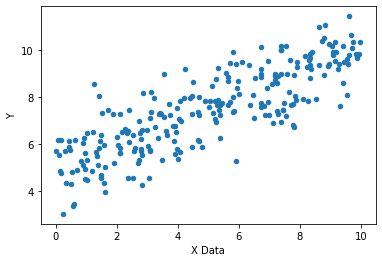

In [13]:
 #to generate a sample random row or column
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

take the data in batches
else 1,000,000 points is a lot to pass in at once

In [0]:
import tensorflow as tf

In [0]:
batch_size = 8

** Variables **

In [0]:
#randomly initialising m , b
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [0]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [0]:
y_model = m*xph + b

** Loss Function **

In [0]:
error = tf.reduce_sum(tf.square( yph- y_model))

** Optimizer **

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [0]:
init = tf.global_variables_initializer()
#Only after running tf.global_variables_initializer() in a session
# the variables hold the values you told them to hold when you declare them 

### Session

In [0]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [35]:
model_m

0.49497643

In [36]:
model_b

4.8840876

### Results

In [0]:
y_hat = x_data * model_m + model_b

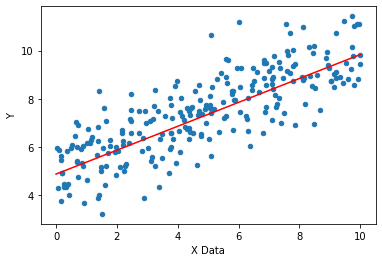

In [39]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [0]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [0]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [44]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [0]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [0]:
estimator.train(input_fn=input_func,steps=1000)

### Evaluation

In [0]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

In [0]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

In [0]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

### Predictions

In [0]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [54]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9um2nzij/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2362704], dtype=float32)},
 {'predictions': array([4.931397], dtype=float32)},
 {'predictions': array([5.626524], dtype=float32)},
 {'predictions': array([6.3216505], dtype=float32)},
 {'predictions': array([7.016777], dtype=float32)},
 {'predictions': array([7.7119036], dtype=float32)},
 {'predictions': array([8.40703], dtype=float32)},
 {'predictions': array([9.102158], dtype=float32)},
 {'predictions': array([9.797284], dtype=float32)},
 {'predictions': array([10.492411], dtype=float32)}]

In [55]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9um2nzij/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
predictions

[array([4.2362704], dtype=float32),
 array([4.931397], dtype=float32),
 array([5.626524], dtype=float32),
 array([6.3216505], dtype=float32),
 array([7.016777], dtype=float32),
 array([7.7119036], dtype=float32),
 array([8.40703], dtype=float32),
 array([9.102158], dtype=float32),
 array([9.797284], dtype=float32),
 array([10.492411], dtype=float32)]

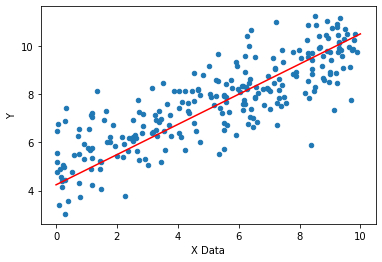

In [57]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')